In [1]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

In [2]:
## import table from HFHI
mortgagerelief = pd.read_csv('MRData.csv')
mortgagerelief.head(1)

,Affiliate,ID,Loan No,Street Address\n(ex: 1234 Five Lane),City,State Abbreviation,Zip,Sales Price,Closing Date\n(mm/yyyy),Term (Months),...,12-month report\nFinancial counseling provided during period of mortgage relief,12-month report\nOther training/support received from HFH?,12-month report\nDescription of other training received,12-month report\nReferrals to other agencies,12-month report\nDescribe referral,12-month report Resident Loan number-referenced) currently residing in home?,"12-month report If resident no longer residing in home, please explain",12-month report-additional details on titleholders residing in home,Note,Funds
0,Aitkin County HFH (MN),1,78001567,NaN,Aitkin,MN,56431,"$ 88,800.00",9/27/2013,240.0,...,Yes,No,local banker/mentor,No,NaN,Yes,NaN,NaN,NaN,Thrivent


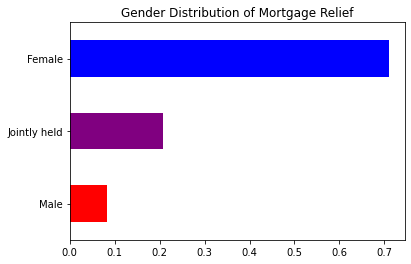

In [20]:
#plot gender data
genders = mortgagerelief['Title Holder Gender'].str.capitalize().value_counts().sort_values()
genders = genders/sum(genders)
genders.plot.barh(color=['red','purple','blue'])
plt.title('Gender Distribution of Mortgage Relief');